In [51]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#initialise metatrader 5 connection
from metaInterface import initMT5, mt5

initMT5()

import time
import pandas as pd

symbol = "GOLD"
timeframe = mt5.TIMEFRAME_H4

df = pd.DataFrame(mt5.copy_rates_from_pos(symbol, timeframe, 0, 50))

df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)#Inplace meanse to save changes to current dataframe
df.rename(columns={
            'open': 'Open',
            'close': 'Close',
            'high': 'High',
            'low': 'Low',
            'tick_volume': 'Volume',
            'spread': 'Spread'},
            inplace=True)

df = df.drop(columns={'real_volume'})
df = df.drop(df['Volume']==0)


df.head(3)
df.tail(3)

MetaTrader 5 initialized successfully.


KeyError: '[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False] not found in axis'

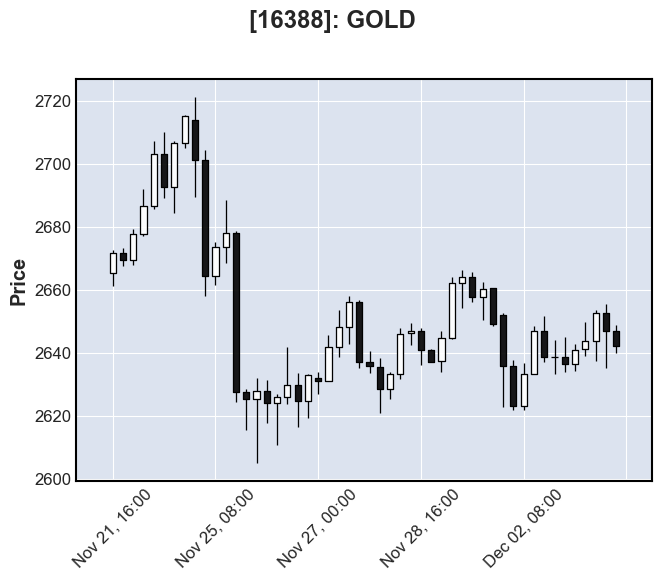

In [52]:
#Use mplFinance to plot
import mplfinance as mpl

mpl.plot(data=df, type="candle", title=f"[{timeframe}]: {symbol}")

In [53]:
#Use Plotly for interactive plotting
import plotly.graph_objects as go

#Create candlestick chart
fig = go.Figure(data=[go.Candlestick(
                go.Candlestick(
                    x=df.index,
                    open=df['Open'],
                    high=df['High'],
                    low=df['Low'],
                    close=df['Close'],
                    increasing_line_color='white',  # Bullish candle color
                    decreasing_line_color='#78ddf7',   # Bearish candle color
                    increasing_fillcolor='white',  # Optional: Change fill color
                    decreasing_fillcolor='#78ddf7'        # Optional: Change fill color
                ) ) ] )

fig = fig.update_layout(
    title=f"[{timeframe}]: {symbol}",
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=True,
    height=600,  # Increase the figure height
    width=1000,  # Increase the figure width
    margin=dict(l=50, r=50, t=50, b=50),  # Add margins
    plot_bgcolor='#525253',  # Chart background
    paper_bgcolor='#525253',     # Overall background
    xaxis=dict(showgrid=True, gridcolor='darkgoldenrod'),
    yaxis=dict(showgrid=True, gridcolor='darkgoldenrod')
)

fig.show()
